In [1]:
import re
import pandas as pd
from os import listdir
from os.path import isfile, join
import seaborn as sns
import numpy as np

In [2]:
# import all csv's in data directory
# save in memory as list
indeed_jobs = [f for f in listdir('../data/scraped_data') if isfile(join('../data/scraped_data', f))]

In [3]:
# instantiate empty df and combine all csv
df = pd.DataFrame()
for file in indeed_jobs:
    df = pd.concat([df, pd.read_csv(f'../data/scraped_data/{file}')])

In [4]:
## save combined data as single csv file
df.to_csv('/mnt/c/Users/SAMSON/DataAnalysis/projects/Aggregator/Analysis/scraped_jobs.csv')

In [5]:
## null is parsed as na value
coltypes = {'salary': str}
raw_data: pd.DataFrame = pd.read_csv('./scraped_jobs.csv', dtype=coltypes, na_values=['Null'], parse_dates=['post_date'], index_col=False)

In [6]:
data: pd.DataFrame = raw_data.copy()

## OBJECTIVE

* CLEAN DATA SCRAPED FROM INDEED WEBSITE 

## DATA DICTIONARY

* **COMPANY_NAME** : NAME OF COMPANY/ORGANIZATION OFFERING JOB

* **COUNTRY** : COUNTRY 

* **JOB_DESCRIPTION** : WHAT THE COMPANY IS LOOKING FOR(LOL CHANGE THIS LATER)

* **JOB_FIELD** : 

* **JOB_TITLE** :

* **JOB_TYPE** :

* **NON_REMOTE_LOCATION** :

* **POST_DATE** :

* **RATING** :

* **REMOTE_LOCATION** :

* **SALARY** :


In [7]:
data.head()

,Unnamed: 0,company_name,country,job_description,job_field,job_title,job_type,non_remote_location,post_date,rating,salary
0,0,Kmart,AUSTRALIA,"Building and updating dashboards, understand...",data analyst,Data Analyst,NaN,Remote in Mulgrave VIC,2022-07-20,3.8,NaN
1,1,Telstra,AUSTRALIA,Draw insights from data that you use to tell...,data analyst,Data Insights &amp; Analytics Analyst,undefined,Melbourne VIC,2022-08-05,4.0,85085-131400
2,2,Optimum Patient Care Australia,AUSTRALIA,Our dynamic and internationally recognised res...,data analyst,Junior Data Analyst,NaN,Brisbane QLD 4000,2022-07-17,NaN,NaN
3,3,Link Group,AUSTRALIA,Complete task allocated by the lead analyst ...,data analyst,Business Data Analyst - Graduates Welcome to A...,graduate,Melbourne VIC,2022-08-02,2.7,NaN
4,4,Minutes To Seconds,AUSTRALIA,Demonstrated experience working with big dat...,data analyst,Data Analyst,full-time,Canberra ACT,2022-08-04,NaN,NaN


In [8]:
## dataframe shape
data.shape

(22747, 11)

DATAFRAME CONTAINS 12 COLUMNS AND 22,109 ROWS

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22747 entries, 0 to 22746
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           22747 non-null  int64         
 1   company_name         22744 non-null  object        
 2   country              22747 non-null  object        
 3   job_description      22747 non-null  object        
 4   job_field            22747 non-null  object        
 5   job_title            22747 non-null  object        
 6   job_type             17031 non-null  object        
 7   non_remote_location  22747 non-null  object        
 8   post_date            22747 non-null  datetime64[ns]
 9   rating               15181 non-null  float64       
 10  salary               4592 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 1.9+ MB


DATA CONTAINS CONTAINS COLUMNS WITH A LARGE AMOUNT OF MISSING VALUES

In [10]:
data.describe(include='all')

/tmp/ipykernel_16268/1336221646.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,Unnamed: 0,company_name,country,job_description,job_field,job_title,job_type,non_remote_location,post_date,rating,salary
count,22747.000000,22744,22747,22747,22747,22747,17031,22747,22747,15181.000000,4592
unique,NaN,9621,4,20860,78,13254,14,5824,31,NaN,2107
top,NaN,"JPMorgan Chase Bank, N.A.",USA,Lead and co-ordinate teams of information sy...,marketing specialist,Data Analyst,full-time,London,2022-07-17 00:00:00,NaN,50000-60000
freq,NaN,269,5949,29,3979,612,10262,1689,11375,NaN,51
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-17 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-16 00:00:00,NaN,NaN
mean,481.168110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.749226,NaN
std,283.455541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.445347,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,236.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,NaN


INITIAL INSPECTION:

*   UNNAMED: 0 , NON UNIQUE COLUMN CONTAINING FILE INDEX(UNNECCCESARY FOR ANALYSYIS AND WOULD BE DROPPED)

*    COMPANY_NAME: CONTAINS A LOT OF MISSING VALUES, WOULD BE FUTHER INVESTIGATED

*    COUNTRY: CONTAINS 4 UNIQUE VALUES

*    JOB_DESCRIPTION: (FEATURE ENGINEERING: SELECT FREQUENT KEYWORDS, HANDLE MISSING ROWS)

*   JOB_TITLE: (HANDLE_MISSING ROWS, FEATURE ENGINEERING)

*   JOB_TYPE: (COLUMN OF UNIQUE ENUM DATA, CLEAN INTO CATEGORIES)

*   NON_REMOTE_LOCATION & REMOTE_LOCATION(FEATURE ENGINEERING, CLEAN INFORMATION, HANDLE MISSING ROWS)

*   POST_DATE: (CONVERT TO DATETIME, TIME SERIES ANALYSIS)

*   RATING: (HANDLE MISSING DATA)

*   SALARY: EXTRACT UPPER AND LOWER SALARY RANGE , HANDLE MISSING DATA

In [11]:
##   DROP Unnamed: 0
data.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
## check the number of missing values
data.isnull().sum().sort_values()

## Calculate percentage of null values
null_counts = data.isnull().sum()
null_pcts = (null_counts / data.shape[0] ) * 100


null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_pcts})
null_df

,null_counts,null_pct
company_name,3,0.013189
country,0,0.000000
job_description,0,0.000000
job_field,0,0.000000
job_title,0,0.000000
job_type,5716,25.128588
non_remote_location,0,0.000000
post_date,0,0.000000
rating,7566,33.261529
salary,18155,79.812723


In [13]:
## duplicated columns containing rows with job listings posted on different days 
## nan rows were excluded as the duplicate method takes nan into account 
data[data.duplicated(keep=False, subset=['company_name', 'job_description', 'job_title'])]

,company_name,country,job_description,job_field,job_title,job_type,non_remote_location,post_date,rating,salary
0,Kmart,AUSTRALIA,"Building and updating dashboards, understand...",data analyst,Data Analyst,NaN,Remote in Mulgrave VIC,2022-07-20,3.8,NaN
7,Mercedes-Benz Australia/Pacific Pty Ltd,AUSTRALIA,Experience in data management and data gover...,data analyst,Data &amp; Reporting Analyst,permanent,Melbourne VIC,2022-07-17,4.0,NaN
17,Disney Streaming,AUSTRALIA,Familiarity with data exploration and data v...,data analyst,"Data Analyst, Disney+",NaN,Melbourne VIC,2022-07-17,NaN,NaN
20,Kmart,AUSTRALIA,Familiarity with enterprise data warehouses ...,data analyst,Customer Data Analyst,NaN,Mulgrave VIC,2022-07-17,3.8,NaN
22,Origin Energy,AUSTRALIA,"Design, build and test data transformation j...",data analyst,Data Analyst,permanent,Hybrid remote in Melbourne VIC,2022-08-11,3.8,NaN
...,...,...,...,...,...,...,...,...,...,...
22472,peoplecanfly,USA,"Collaborate with artists, designers and game...",ui ux designer,UI Engineer,full-time,"Remote in Chicago, IL+3 locations",2022-07-17,NaN,NaN
22507,Siuvo,USA,The important skills for this position are J...,ui ux designer,Frontend Software Engineer,NaN,"Princeton, NJ 08540",2022-07-17,NaN,NaN
22586,"Zoom Video Communications, Inc.",USA,"The team is a blend of UX research, UX desig...",ui ux designer,"Senior UX Designer, Online e-Commerce",full-time,"Remote in San Jose, CA 95113+1 location",2022-07-19,4.1,NaN
22602,"VIZIO, Inc.",USA,As a Senior Product Designer – System Design...,ui ux designer,Senior Product Designer,undefined,"Denver, CO 80206 (Cherry Creek area)",2022-07-17,3.6,137000


In [14]:
## data contains duplicate rows
## jobs posted on different days
data = data.drop_duplicates(subset=['company_name', 'job_description', 'job_title'])

<AxesSubplot:>

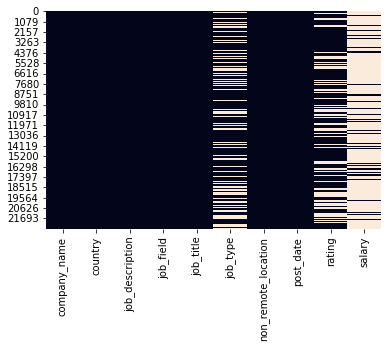

In [15]:
sns.heatmap(data.isnull(), cbar=False)

In [16]:
data['job_field'].value_counts()
def clean_field(value):
    if 'science' in value:
        return 'data scientist'
    if 'analyst' in value:
        return 'data analyst'
    if 'designer' in value:
        return 'ui ux designer'
    return value

data['job_field'] = data['job_field'].apply(clean_field)

THERE IS NO DISCERNABLE PATTERN FOR COLUMNS WITH MISSING DATA

In [17]:
# data['job_description'] = data['job_description'].str.replace('\n', '')

In [18]:
data['job_type'].value_counts(dropna=False)[:30]

full-time               9966
NaN                     5527
undefined               4445
permanent               1154
contract                 376
part-time                287
internship                95
graduate                  89
temporary                 35
freelance                 10
apprenticeship             9
on call                    4
weekend availability       4
extended hours             1
holidays                   1
Name: job_type, dtype: int64

In [19]:
## job type colume is categorical enum
## some rows contain same categories but in differnt text format or extra words
## some rows contain price information
## these are errors from data gathering and represent rows with no value

In [20]:
# ## rows containing these values have undefined job types
# undefined_list = ['$', '£', 'shift', 'Monday to Friday']

# def clean_job_type(value):
#     """format raw data from job type column to usable data

#     Args:
#         value (str): raw_data

#     Returns:
#         str: formatted data
#     """
#     if value is np.nan:
#         return 'undefined'
#     for label in undefined_list:
#         if label in value:
#             return 'undefined'
#     value = re.sub('[\d+]', '', value).lower()
#     result = 'contract' if 'fixed term' in value or 'contract' in value or 'casual' in value else value
#     result = 'internship' if 'temp to perm'in result else result
#     result =  result.replace('/ co-op', '').strip()
#     return result


# data['job_type'] = data['job_type'].apply(clean_job_type)

In [21]:
## investigation of rows containing the below columns revealed that temporary contracts and casual are contract offers
## aprrenticeship although not popular is a viable employment offer
## temp to perm offers are internship offers
## all others represent corrupted data from scraping
job_types_investigate = [  'temporary contract', 'casual',
                         'temp to perm', 'hour shift', 'day shift', 'hour shift',
                          'monday to friday', 'rotating shift', 'evening shift' ]
data[data['job_type'].isin(job_types_investigate)]
# data[data['job_type'] == 'apprenticeship']

,company_name,country,job_description,job_field,job_title,job_type,non_remote_location,post_date,rating,salary


In [22]:
data['non_remote_location'].value_counts(dropna=False)[:30]


London                                  1614
Toronto, ON                             1169
Sydney NSW                              1058
Remote                                  1035
Melbourne VIC                            578
Montréal, QC                             360
Vancouver, BC                            351
Remote in Toronto, ON                    340
Hybrid remote in London                  266
Remote in London                         255
Mississauga, ON                          212
+1 locationRemote                        196
Remote in Sydney NSW                     189
Brisbane QLD                             167
Sydney NSW 2000                          148
Calgary, AB                              138
Australia                                135
Remote in Vancouver, BC                  125
Canberra ACT                             125
Hybrid remote in Toronto, ON             123
Ottawa, ON                               113
Remote in Melbourne VIC                  102
Perth WA  

In [23]:
## non remote column contains data on jobs required location for work
## values are remote, hybrid(optional remote and physical location) and the physical locations
def clean_location(value: str):
    value = value.lower()
    if 'hybrid' in value:
        return 'hybrid'
    if 'remote' in value:
        return 'remote'
    value = re.sub(r'[^\w,]', ' ',value)
    return value



data['clean_location'] = data['non_remote_location'].apply(clean_location)

In [24]:
## date age column contains date of job posting ranging from 14-07-2022 to 14-08-2022 in yyyy-mm-dd format

data['post_date']

0       2022-07-20
1       2022-08-05
2       2022-07-17
3       2022-08-02
4       2022-08-04
           ...    
22742   2022-08-12
22743   2022-07-17
22744   2022-08-06
22745   2022-07-17
22746   2022-07-17
Name: post_date, Length: 22003, dtype: datetime64[ns]

In [25]:
data['rating'].value_counts(dropna=False)
## rows without rating would be left as is

NaN    7336
3.8    1898
3.9    1837
4.0    1456
3.5    1312
3.7    1270
3.6    1006
4.1     962
3.4     734
4.2     657
3.3     579
4.3     482
3.2     343
3.1     321
3.0     321
4.4     251
5.0     176
4.5     145
2.9     131
2.7     123
4.6     118
2.8     117
4.7      88
4.8      72
2.5      54
2.6      44
2.3      41
2.0      29
2.4      24
2.1      20
1.9      17
4.9      16
1.5       7
1.0       6
2.2       5
1.7       2
1.8       2
1.4       1
Name: rating, dtype: int64

In [26]:
## the remote location column contains data already extracted into clean data
## dropping it is the best option as it provides no analytical importance
# data = data.drop(columns=['remote_location'])

In [27]:
data['salary']

0                 NaN
1        85085-131400
2                 NaN
3                 NaN
4                 NaN
             ...     
22742             NaN
22743             NaN
22744             NaN
22745    62000-151000
22746             NaN
Name: salary, Length: 22003, dtype: object

In [28]:
## separate columns into higher and lower range
## data contains salaries in 4 denominations
## united states dollars, canadian dollars, great britain ponds and australian dollars
## for consistency they would all be transformed to united states dollars


data[['lower_salary_range_usd', 'upper_salary_range_usd']] = data['salary'].str.split('-', expand=True)

In [29]:
def daily_to_yearly(value:str):
        """return the yearly equivalent pay for jobs with daily pay offers

        Args:
            value (int): integer for operation

        Returns:
            value(int): result of operation
        """
        if pd.isna(value):
            return value
        if 'K' in value:
            return float(value.replace('K', '')) * 1000 
        if float(value) < 150:
            return float(value) * 8 * 260
        if float(value) < 2600:
            return float(value) * 260
        if float(value) < 7000:
            return float(value) * 12
        return float(value)


countries = {'Canada': 0.7827, 'Australia': 0.712665, 'United Kingdom': 1.214175}

def curr_to_usd(row):
    if pd.notna(row['lower_salary_range_usd']) and row['country'] in countries:
        row['lower_salary_range_usd'] = round(row['lower_salary_range_usd'] * countries[row['country']], 2)
    if pd.notna(row['upper_salary_range_usd']) and row['country'] in countries:
        row['upper_salary_range_usd'] = round(row['upper_salary_range_usd'] * countries[row['country']], 2)
    return row


def calculate_avg_salary(row):
    row['average_salary_usd'] = row['lower_salary_range_usd']
    if pd.notna(row['lower_salary_range_usd']) and pd.notna(row['upper_salary_range_usd']):
        row['average_salary_usd'] = (row['lower_salary_range_usd'] + row['upper_salary_range_usd'])/2
    return row



data['lower_salary_range_usd'] = data['lower_salary_range_usd'].apply(daily_to_yearly)

data['upper_salary_range_usd'] = data['upper_salary_range_usd'].apply(daily_to_yearly)



data = data.apply(curr_to_usd, axis=1)

data = data.apply(calculate_avg_salary, axis=1)



In [30]:
# data['job_description'].dropna().apply(len).max()
# data['country'].value_counts()
data['job_field'].unique()
PATTERNS = [ 'product%20manager', 'data%20scientist', 'Data+scientist', 'Data%20scientist',
            'marketing%20specialist', 'ui%20ux%20designer', 'software%20engineer', 
            'data%20analyst'
            ]

def extract_job_field( url: str) -> str:
        """extracts job field from request """
        for pattern in PATTERNS:
            if pattern in url:
                result = pattern.lower().replace('+', ' ').replace('%20', ' ')
                return result
        return url

data['job_field'] = data['job_field'].apply(extract_job_field)

In [31]:
data.to_csv('../data/cleaned_data.csv', index=False)